In [2]:
import numpy as np
import pandas as pd
import datetime
import os

In [5]:
folder = 'data'
ext = '.csv'
def get_list_of_files(directory, extension):
    list_of_files = []
    for root, dirs, files in os.walk(directory):
        list_of_files = [os.path.join(root, x) for x in files if x.endswith(extension)]
    return list_of_files
list_of_data_files = get_list_of_files(folder, ext)

In [7]:
def generate_train_target_sets(time_series, n_timesteps):
    l = time_series.shape[0]
    X = [time_series[i:i+n_timesteps, :] for i in range(l - n_timesteps +1)]
    print(np.array(X).shape)
    
for f in list_of_data_files[:1]:
    data = pd.read_csv(f).values
    data = add_features(data, )
    print(data.shape)
    generate_train_target_sets(data, 50)


(252, 7)
(203, 50, 7)


In [92]:
def calc_RSI(close_values, based_on='EMA', window_length=14):
    # Get the difference in price from previous step
    delta = close_values.diff()
    # Get rid of the first row, which is NaN since it did not have a previous 
    # row to calculate the differences
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the EWMA
    roll_up1 = up.ewm(span=window_length).mean()
    roll_down1 = down.abs().ewm(span=window_length).mean()

    # Calculate the RSI based on EWMA
    RS1 = roll_up1 / roll_down1
    RSI1 = 100.0 - (100.0 / (1.0 + RS1))

    # Calculate the SMA
    roll_up2 = up.rolling(window_length).mean()
    roll_down2 = down.abs().rolling(window_length).mean()

    # Calculate the RSI based on SMA
    RS2 = roll_up2 / roll_down2
    RSI2 = 100.0 - (100.0 / (1.0 + RS2))
    
    return RSI1

calc_RSI(df['Adj Close'], based_on='EMA')

1      0.000000
2      0.000000
3      0.000000
4     80.987478
5     83.541066
        ...    
93    19.838140
94     8.060160
95     6.803127
96     4.115033
97    58.679813
Name: Adj Close, Length: 97, dtype: float64

In [100]:
df['Close'].diff()[1:].values

array([-0.03999996, -0.26000023, -0.17000008,  0.86999989,  0.10000038,
        0.        , -0.05000019, -0.05999947, -0.42000008, -0.13000011,
        0.56999969, -0.19999981, -0.14000034, -0.29999924, -0.07000065,
        0.4800005 , -0.19000053,  0.46000004,  1.        , -0.09999943,
       -0.10000038, -0.61999989,  0.40999985, -0.03999996,  0.22000027,
        1.15999985,  1.94999981,  0.84000015, -0.67000008,  1.96000004,
       -1.38000011,  1.22000027,  0.13000011,  1.92000008,  0.04999924,
        1.07999992, -0.82999992,  2.8900013 ,  2.77999878,  5.22999954,
       -1.38999939, -0.54999924, -1.44000053, -3.15999985,  1.52000046,
       -0.18000031,  5.09000015, -0.35000038, -1.96000099,  0.41000175,
        0.15999985,  0.03999901, -0.80999947, -0.51000023,  1.30999947,
       -1.26000023,  2.54000092, -0.46999931,  0.64999962, -0.94000053,
       -2.12000084, -0.96999931,  0.44000053, -1.55000114, -0.1799984 ,
        1.22999954, -1.05999947,  1.45999908,  0.20000076,  0.72

In [93]:
# def calc_percentage_change():
    
df['Change_percent'] = np.concatenate((np.array([np.nan]), 
                                ((df['Close'].diff().iloc[1:, :].values)/(df['Close'].iloc[:-1, :].values)).reshape(-1)))*100
df

IndexingError: Too many indexers

In [48]:
df = pd.read_csv('pltr.csv')

def add_features(df, days_to_calc_moving_avg = [20, 30, 45]):
    def calc_simple_moving_avg(df, day):
        return df[['Close']].rolling(day).mean().values

    def calc_exponential_moving_avg(df, day):
        c = 2 / (day+1)
        return df[['Close']].ewm(span=day).mean().values

    df['Change'] = df['Adj Close'] - df['Open']
    if days_to_calc_moving_avg:
        for d in days_to_calc_moving_avg:
            df['SMA_' + str(d)] = calc_simple_moving_avg(df, d)
            df['EMA_' + str(d)] = calc_exponential_moving_avg(df, d)

    return df

add_features(df).tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,SMA_20,EMA_20,SMA_30,EMA_30,SMA_45,EMA_45
93,2021-02-12,33.360001,33.650002,31.340000,31.91,31.91,60359100,-1.450001,32.8190,32.536118,30.139000,31.154735,29.026889,29.383877
94,2021-02-16,30.020000,30.440001,27.299999,27.84,27.84,178983600,-2.180000,32.9290,32.088836,30.282000,30.940502,29.053778,29.315754
95,2021-02-17,27.990000,29.730000,27.000000,27.08,27.08,149036300,-0.910000,32.9520,31.611772,30.405667,30.691024,29.054667,29.217165
96,2021-02-18,24.990000,26.309999,24.500000,25.17,25.17,307870700,0.180000,32.8935,30.998232,30.424667,30.334275,29.009556,29.038810
97,2021-02-19,27.020000,29.959999,26.900000,29.00,29.00,318009800,1.980000,33.0445,30.807914,30.606667,30.248068,29.048667,29.037100


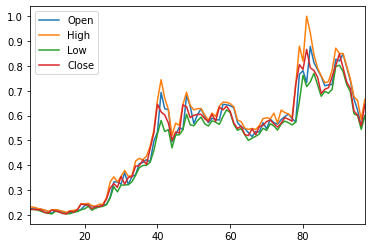

In [49]:
def normalize_data(df, cols=['Open', 'High', 'Low', 'Close', 'Adj Close'], skip_days=5):
    df = df.iloc[skip_days:, 1:]
    max_price = df[cols].values.max()
    df[cols] = df[cols] / max_price
    max_val = df['Volume'].values.max()
    df['Volume'] = df['Volume']/max_val
    return df

normalized_data = normalize_data(df)
normalized_data
normalized_data.iloc[:, :4].plot()

In [ ]:
20:30.81 
30:30.21 
45:28.60